**Análise Exploratória – Chamados de Suporte Técnico**

Este notebook tem como objetivo realizar uma análise exploratória dos dados de chamados de suporte técnico, buscando identificar
padrões e oportunidades de melhoria no atendimento.


In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [ ]:
# Carregando os dados
df = pd.read_excel("/content/chamados_suporte.xlsx")

In [ ]:
# Top 5 linhas do DF
df.head()

,id_chamado,data_abertura,categoria,prioridade,status,tempo_resolucao_horas,data_fechamento,dia_semana,mes
0,1,2025-01-01 00:00:00,Financeiro,Média,Resolvido,6.975673,2025-01-01 06:58:32.421363636,Wednesday,1
1,2,2025-01-01 01:00:00,Dúvida,Média,Resolvido,4.822897,2025-01-01 05:49:22.429954246,Wednesday,1
2,3,2025-01-01 02:00:00,Infraestrutura,Baixa,Pendente,5.220855,2025-01-01 07:13:15.078239302,Wednesday,1
3,4,2025-01-01 03:00:00,Acesso,Alta,Resolvido,2.912119,2025-01-01 05:54:43.629230941,Wednesday,1
4,5,2025-01-01 04:00:00,Sistema,Média,Resolvido,6.945492,2025-01-01 10:56:43.770551431,Wednesday,1


In [ ]:
# Resumo do DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_chamado             500 non-null    int64  
 1   data_abertura          500 non-null    object 
 2   categoria              500 non-null    object 
 3   prioridade             500 non-null    object 
 4   status                 500 non-null    object 
 5   tempo_resolucao_horas  500 non-null    float64
 6   data_fechamento        500 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.5+ KB


In [ ]:
# Estatísticas descritivas do DF

df.describe()

,id_chamado,tempo_resolucao_horas
count,500.000000,500.000000
mean,250.500000,5.737136
std,144.481833,2.726079
min,1.000000,0.500000
25%,125.750000,3.811542
50%,250.500000,5.725201
75%,375.250000,7.638175
max,500.000000,14.386215


In [ ]:
# Conferência de campos nulos

df.isnull().sum()

,0
id_chamado,0
data_abertura,0
categoria,0
prioridade,0
status,0
tempo_resolucao_horas,0
data_fechamento,0


In [ ]:
# Tratando os dados

df["data_abertura"] = pd.to_datetime(df["data_abertura"])
df["data_fechamento"] = pd.to_datetime(df["data_fechamento"])

df["dia_semana"] = df["data_abertura"].dt.day_name()
df["mes"] = df["data_abertura"].dt.month

In [ ]:
# Quantidade de registros por categoria

df["categoria"].value_counts()

,count
categoria,
Sistema,154
Acesso,105
Financeiro,87
Dúvida,83
Infraestrutura,71


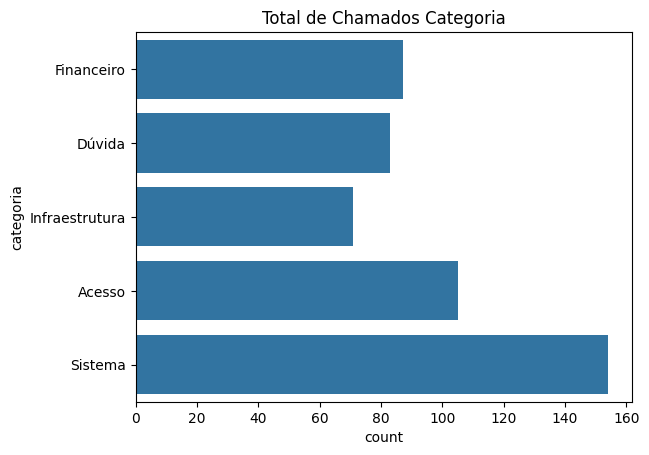

In [ ]:
# Gráfico de registros por categoria

sns.countplot(data=df, y="categoria")
plt.title("Total de Chamados Categoria")
plt.show()

Observa-se que a categoria **Sistema** apresenta o maior tempo médio
de resolução, indicando possível necessidade de reforço técnico
ou revisão de processos.


In [ ]:
# Tempo médio por prioridade

df.groupby("prioridade")["tempo_resolucao_horas"].mean()

,tempo_resolucao_horas
prioridade,
Alta,2.002990
Baixa,7.962455
Média,5.069038


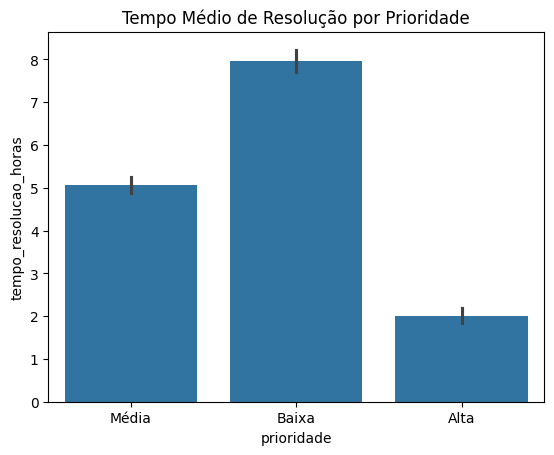

In [ ]:
# Gráfico de tempo médio por prioridade

sns.barplot(
    data=df,
    x="prioridade",
    y="tempo_resolucao_horas",
    estimator="mean"
)
plt.title("Tempo Médio de Resolução por Prioridade")
plt.show()

Nesta etapa, analisamos o tempo médio de resolução por prioridade
para identificar possíveis problemas operacionais.


In [ ]:
# Define SLA máximo de 4 horas

df["fora_sla"] = df["tempo_resolucao_horas"] > 4

In [ ]:
# Porcentagem de chamados dentro x fora do SLA de 4 horas

df["fora_sla"].value_counts(normalize=True) * 100

,proportion
fora_sla,
True,73.4
False,26.6


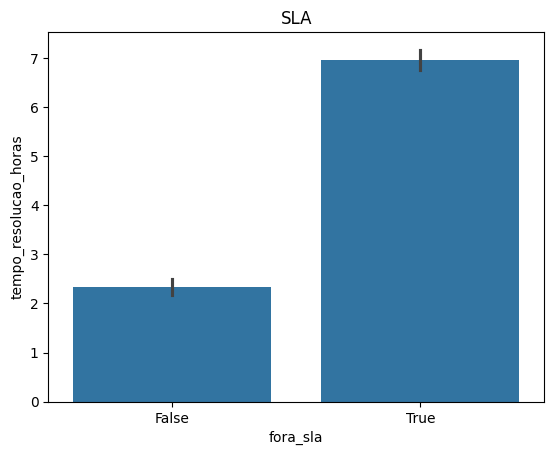

In [ ]:
# Gráfico de % dentro x fora do SLA

sns.barplot(data=df,
            x="fora_sla",
            y="tempo_resolucao_horas",
            )
plt.title("SLA")
plt.show()

Observa-se que 73,4% dos chamados estão fora do tempo estimado de 4 horas definido pelo SLA, o que indica um cenário crítico de desempenho operacional e reforça a necessidade de investigar as principais causas desse desvio.


## Conclusão

A análise exploratória dos dados de chamados de suporte técnico evidenciou pontos críticos no desempenho operacional, especialmente no cumprimento do SLA. Observou-se que uma quantidade significativa dos chamados ultrapassa o tempo estimado de atendimento, indicando a necessidade de revisão de processos.

Além disso, a segmentação por categoria e prioridade demonstrou que determinados tipos de chamados concentram tempos médios de resolução superiores à média geral, sugerindo possíveis gargalos técnicos ou operacionais.

De forma complementar, os insights obtidos nesta análise em estão alinhados com os resultados apresentados no dashboard desenvolvido em Power BI, fortalecendo a consistência das métricas e a confiabilidade das conclusões.
